In [4]:
import pandas as pd
import numpy as np

# Read all data and set hn as index

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
#df.head() # จะโชว์แค่5อัน
df

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing

Check number of data

In [32]:
df.shape

(1723, 23)

Check any missing data in each column

In [33]:
df.isnull()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634477,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2633633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2630496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167041,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2623351,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [3]:
#df.isnull().sum(axis=0)
#df.isnull().sum()/1723*100
df.isnull().sum()

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

Delete column with missing data

ควรลบข้อมูล column ที่ null เยอะๆออกให้หมด

In [6]:
df_clean_column = df.drop(['size','appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)
# size กับ OPDsize หมอบอกคืออันเดียวกันเพราะงั้นลบซักอัน
# 0 row / 1 column

age            0
parity         0
hiv            4
menopaus       1
disease        0
surgery        0
conization     5
OPDsize       17
stage         24
pchemo         1
finalhisto    10
utmet         98
vgmet         97
pmmet         94
dtype: int64

Delete row with at least 1 missing data

In [7]:
df_clean = df_clean_column.dropna(axis = 0)
#แถวไหนมี missing data ดรอบไป

Total Clean Data

In [6]:
df_clean.shape

(1571, 14)

Check number of sample in pelvicme class 

In [8]:
pel_class = np.unique(df_clean['pmmet'])
#pel_class = df_clean['pmmet'].unique()
pel_class

array([0., 1.])

In [9]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1291, 280]

-----------------

In [9]:
df_clean.groupby('pmmet').count()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,stage,pchemo,finalhisto,utmet,vgmet
pmmet,,,,,,,,,,,,,
0.0,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291,1291
1.0,280,280,280,280,280,280,280,280,280,280,280,280,280


-----------------

Separate pelviceme dataset into data (X) and label (y)

In [10]:
# เราจะเอา ค่า pmmet มาเป็นคำตอบของ model ดังนั้นเลยเก็บค่าไว้ใ้ช้
y = df_clean['pmmet'].values # คำตอบ
X = df_clean.drop(['pmmet'],axis = 1).values # ข้อมูล

In [13]:
X.shape
# มี 1571 ข้อมูล แต่ละข้อมูล มี 13 feture

(1571, 13)

Separate Data into Train & Test (Note: Imbalance Dataset)

In [12]:
# scikit-learn คือ libary ที่เกีย่วกับ learning

from sklearn.model_selection import train_test_split # แบ่งข้อมูลออกมา 2 กลุ่ม คือ train กับ test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) # ให้ test มีขนาด 20% ของ train
# แบ่งข้อมูลโดย random_state=0 ทุกคนจะได้ออกมาเหมือนจาร

# โดยปกติ 70% train - 30% test
# หรือถ้ามีข้อมูลน้อยมากๆ 80% train - 20% test

Data normalization to range of (0 to 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
# สร้างscalมา โดยแบ่งข้อมูล ให้อยู่ให้ช่วง 0-1  // ถ้าไม่ใส่คำสั่งไป มันก็จะจัดให้ 0-1 อยู่ละ
scaler.fit(X_train) 
# เอาข้อมูลใน train มาสร้าง scale ในการปรับข้อมูล fit
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [20]:
np.min(X_train_norm, axis=0) #ค่าที่ต้่่ำสุดของทุกcolumnคือ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.max(X_train_norm, axis=0)

# Logistic Regression 

10-Folds Cross Validation Training Accuracy with Tuning

In [ ]:
from sklearn.svm import SVC
params = {'C': [1, 2, 4, 8, 16],
         'gamma' : [0,1]}
model =  SVC()
.
.
.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # ตัวที่มีคำสั่ง เอาไว้จูน (Tune) model

params = {'C': [1, 2, 4, 8, 16]} # ตั้งว่าช่วงค่าจูน ของ C ที่เป็นไปได้ได้แก่ 1 2 4 8 16
# C ชื่อparamiterของLogisticRegressionมีหลายอันไปหาดู
#params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#params = {'max_iter' : [100,200,500] }



# code แบบยาวๆ

    # model = LogisticRegression(random_state=0, solver='liblinear')
    # best_model = GridSearchCV(model,params,cv=10)
    
    # best_model.fit(X_train_norm, y_train)
    
# code แบบสรุป

clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10) 
# เลือก paramiter ที่เหมาะที้่สุดของLogisticRegression

clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 81.37079365079366


Test Accuracy

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 87.61904761904762


In [27]:
y_predict = clf.predict(X_test_norm)
#  predict ของ X_test_norm ใน clf และ เก็บผลทำนายไว้ที่ y_predict

100 * sum(y_test == y_predict) / len(y_test)
# คำตอบจริงๆ คือ y_test
# sum(y_test == y_predict) นับ จน. ว่ามีกี่กันที่ predict ถูก-ตรงกับคำตอบ

87.61904761904762

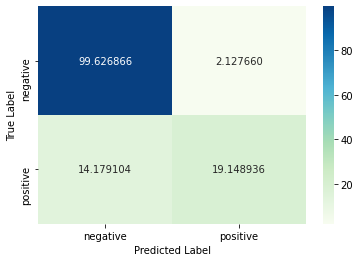

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# confusion_matrix จะให้คำตอบเราว่า เวลาทายข้อมูล ทาย คราสไหนแม่นไม่แม่น / แล้ว ทาย ผิดไปที่คราสไหนกี่ % 

The precision is the ratio tp / (tp + fp). The precision is the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn). The recall is the ability of the classifier to find all the positive samples.

The F score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

In [29]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.88      1.00      0.93       268
    positive       0.90      0.19      0.32        47

    accuracy                           0.88       315
   macro avg       0.89      0.59      0.62       315
weighted avg       0.88      0.88      0.84       315



# Support Vector Machine

10-Folds Cross Validation Training Accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Test Accuracy

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

# Random Forest

10-Folds Cross Validation Training Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Test Accuracy

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

# XGBoost

10-Folds Cross Validation Training Accuracy

In [ ]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Test Accuracy

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

# **My choice Model**

# **Support Vector Machines**

0.0001 < gamma < 10 <br>
0.1 < c < 100
<br> https://scikit-learn.org/stable/modules/svm.html
<br> https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
<br> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br> https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [0.1,1,10],
    'gamma' : [0.0001,0.002,0.04,0.8,1.8,3.2,5,10],
    'break_ties' : ['True']
}

clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1, 'gamma': 1.8}
10CV accuracy : 81.92825396825396


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
100*sum(y_test == y_predict)/len(y_test)

86.98412698412699

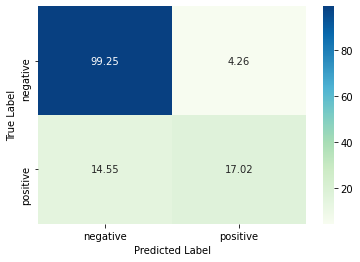

In [129]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [130]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.87      0.99      0.93       268
    positive       0.80      0.17      0.28        47

    accuracy                           0.87       315
   macro avg       0.84      0.58      0.60       315
weighted avg       0.86      0.87      0.83       315

